In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Test Train Split
from sklearn.model_selection import train_test_split

# Build Model
from sklearn.linear_model import Lasso

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset/code?datasetId=1408058

In [2]:
df = pd.read_csv('body_fat_data.csv')
df.shape

(252, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Unnamed: 0                                                                       252 non-null    int64  
 1   Percent body fat using Siri equation 495/Density                                 252 non-null    float64
 2   Density gm/cm^3                                                                  252 non-null    float64
 3   Age                                                                              252 non-null    int64  
 4   Weight (lbs)                                                                     252 non-null    float64
 5   Height (inches)                                                                  252 non-null    float64
 6   Adiposity 

In [4]:
# Drop first column of dataframe
df = df.iloc[: , 1:]

# Renaming Colummns for simple view
df.rename(columns={'Percent body fat using Siri equation 495/Density': 'BodyFat',
                   'Density gm/cm^3': 'Density',
                  'Weight (lbs)': 'Weight',
                  'Height (inches)': 'Height',
                  'Adiposity index = Weight/Height^2 (kg/m^2)' : 'AdiposityIndex',
                 'Fat Free Weight (1 - fraction of body fat) * Weight, using Brozek formula (lbs)': 'FatFreeWeight',
                  'Neck circumference (cm)': 'Neck',
                   'Chest circumference (cm)': 'Chest',
                   'Abdomen circumference (cm)': 'Abdomen',
                   'Hip circumference (cm)': 'Hip',
                   'Thigh circumference (cm)': 'Thigh',
                   'Knee circumference (cm)': 'Knee',
                   'Ankle circumference (cm)': 'Ankle',
                   'Extended biceps circumference (cm)': 'ExtendedBiceps',
                   'Forearm circumference (cm)': 'Forearm',
                   'Wrist circumference (cm)': 'Wrist'
                  }, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BodyFat         252 non-null    float64
 1   Density         252 non-null    float64
 2   Age             252 non-null    int64  
 3   Weight          252 non-null    float64
 4   Height          252 non-null    float64
 5   AdiposityIndex  252 non-null    float64
 6   FatFreeWeight   252 non-null    float64
 7   Neck            252 non-null    float64
 8   Chest           252 non-null    float64
 9   Abdomen         252 non-null    float64
 10  Hip             252 non-null    float64
 11  Thigh           252 non-null    float64
 12  Knee            252 non-null    float64
 13  Ankle           252 non-null    float64
 14  ExtendedBiceps  252 non-null    float64
 15  Forearm         252 non-null    float64
 16  Wrist           252 non-null    float64
dtypes: float64(16), int64(1)
memory usa

In [6]:
df.shape

(252, 17)

In [7]:
df.head()

,BodyFat,Density,Age,Weight,Height,AdiposityIndex,FatFreeWeight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,ExtendedBiceps,Forearm,Wrist
0,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [8]:
df.describe()

,BodyFat,Density,Age,Weight,Height,AdiposityIndex,FatFreeWeight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,ExtendedBiceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,1.055574,44.884921,178.924405,70.148810,25.436905,143.713889,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,0.019031,12.602040,29.389160,3.662856,3.648111,18.231642,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,105.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,1.041400,35.750000,159.000000,68.250000,23.100000,131.350000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,1.054900,43.000000,176.500000,70.000000,25.050000,141.550000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,1.070400,54.000000,197.000000,72.250000,27.325000,153.875000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,1.108900,81.000000,363.150000,77.750000,48.900000,240.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [9]:
df.isnull().sum()

BodyFat           0
Density           0
Age               0
Weight            0
Height            0
AdiposityIndex    0
FatFreeWeight     0
Neck              0
Chest             0
Abdomen           0
Hip               0
Thigh             0
Knee              0
Ankle             0
ExtendedBiceps    0
Forearm           0
Wrist             0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='BodyFat'>

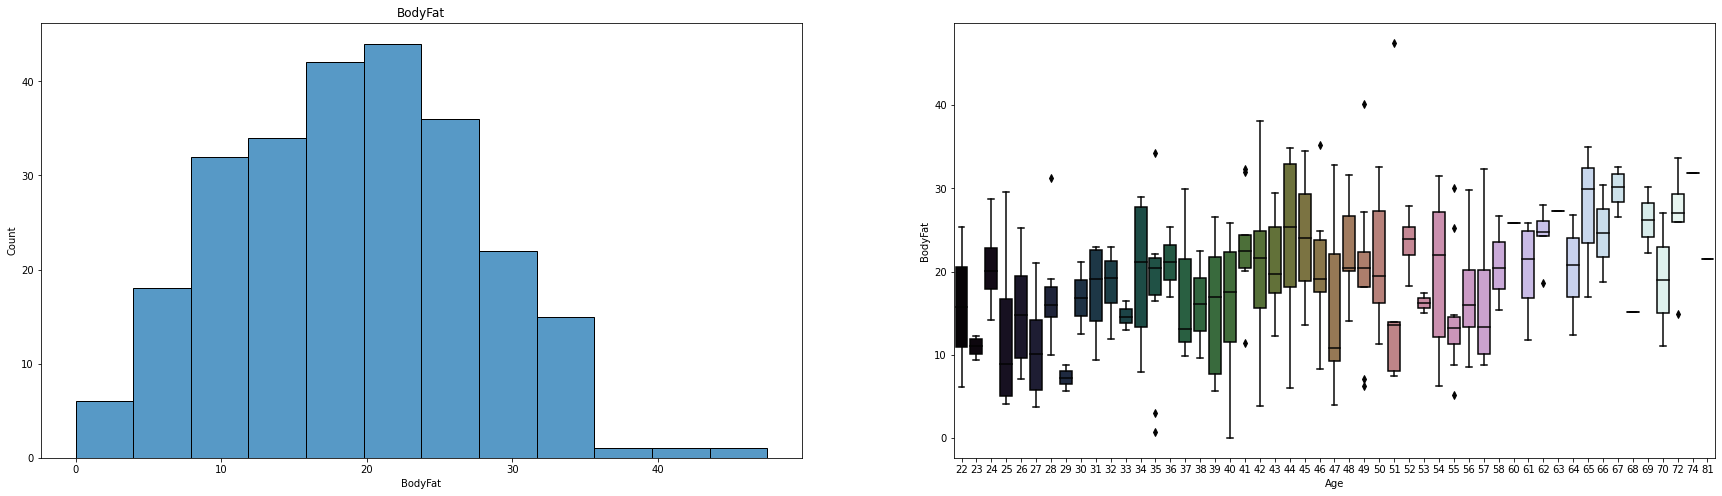

In [10]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('BodyFat')
sns.histplot(df.BodyFat)

plt.subplot(1,2,2)
sns.boxplot(x=df.Age, y=df.BodyFat, palette=("cubehelix"))

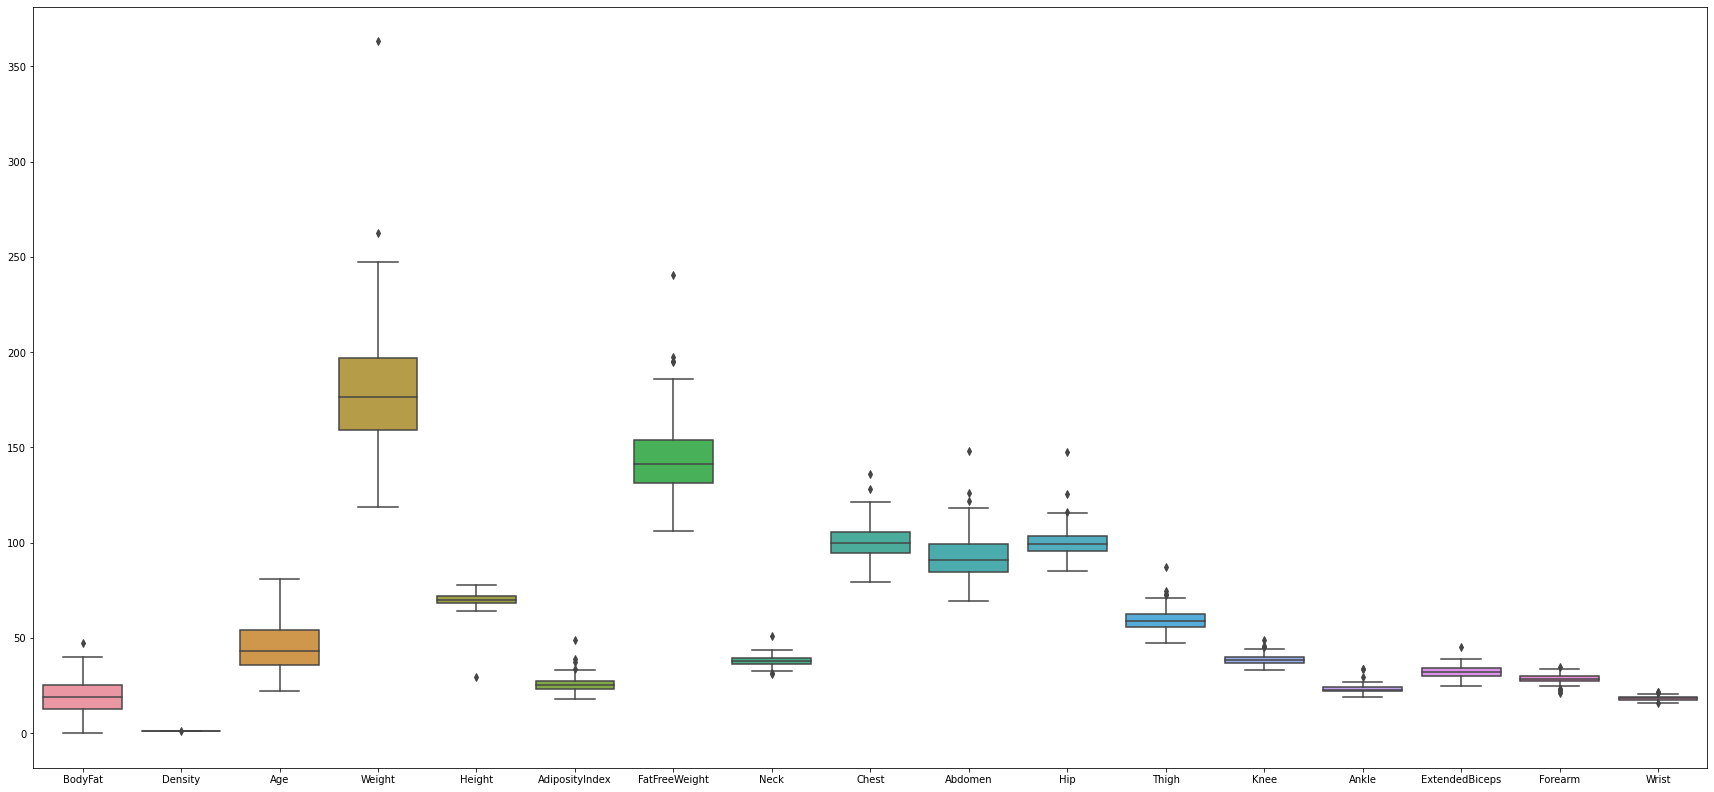

In [11]:
plt.figure(figsize=(30,14))
sns.boxplot(data=df)
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BodyFat         252 non-null    float64
 1   Density         252 non-null    float64
 2   Age             252 non-null    int64  
 3   Weight          252 non-null    float64
 4   Height          252 non-null    float64
 5   AdiposityIndex  252 non-null    float64
 6   FatFreeWeight   252 non-null    float64
 7   Neck            252 non-null    float64
 8   Chest           252 non-null    float64
 9   Abdomen         252 non-null    float64
 10  Hip             252 non-null    float64
 11  Thigh           252 non-null    float64
 12  Knee            252 non-null    float64
 13  Ankle           252 non-null    float64
 14  ExtendedBiceps  252 non-null    float64
 15  Forearm         252 non-null    float64
 16  Wrist           252 non-null    float64
dtypes: float64(16), int64(1)
memory usa

In [13]:
df.describe()

,BodyFat,Density,Age,Weight,Height,AdiposityIndex,FatFreeWeight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,ExtendedBiceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,1.055574,44.884921,178.924405,70.148810,25.436905,143.713889,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,0.019031,12.602040,29.389160,3.662856,3.648111,18.231642,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,105.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,1.041400,35.750000,159.000000,68.250000,23.100000,131.350000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,1.054900,43.000000,176.500000,70.000000,25.050000,141.550000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,1.070400,54.000000,197.000000,72.250000,27.325000,153.875000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,1.108900,81.000000,363.150000,77.750000,48.900000,240.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [14]:
df.head()

,BodyFat,Density,Age,Weight,Height,AdiposityIndex,FatFreeWeight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,ExtendedBiceps,Forearm,Wrist
0,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [15]:
# Linear Regression
X = df.drop('BodyFat',axis=1)
y = df['BodyFat']

# Splitting the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# convert y to numpy array
y = np.array(y)
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# df_scaled.head()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.shape

(201,)

In [18]:
from sklearn.model_selection import KFold


def train_cv(X_sub, y_sub, n_splits=5, shuffle=True):
    k_fold = KFold(n_splits = n_splits, shuffle=shuffle)
    k_fold.get_n_splits(X_sub)
    curr_alpha = 0.00001 #### 0 -> 1
    alpha_list = []
    MSE = []
    for train_index, test_index in k_fold.split(X_sub):
        # print()
        # print('Train:', train_index, 'test', test_index)
        X_train_sub, X_test_sub = X_sub[train_index], X_sub[test_index]
        y_train_sub, y_test_sub = y_sub[train_index], y_sub[test_index]
        
        # specify range of hyperparameters to tune
        # hyper_params = [{'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.1, 0.2, 0.3]}]
        # 0 -> 1
        # train the model, polynomial regression is a linear model
        # create a LR object
        reg_model = Lasso()

        # get each alpha value and train the model
        while curr_alpha <= 1: # 1
            reg_model.set_params(alpha=curr_alpha)
            alpha_list.append(curr_alpha) # [0.00001, 0.00002, 0.00003 ..., 1]
            reg_model.fit(X_train_sub, y_train_sub)
            y_pred_sub = reg_model.predict(X_test_sub)
            MSE.append(mean_squared_error(y_test_sub, y_pred_sub)) ## [0.5, 0.9, 1.5 ....]
            # print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
            curr_alpha += 0.00001
    return MSE, alpha_list

In [19]:
mse, alpha = train_cv(X_train,y_train)

In [20]:
print(min(mse))
print(mse.index(min(mse)))
print(alpha[mse.index(min(mse))])
best_alpha = alpha[mse.index(min(mse))]

0.355087641552902
10080
0.10080999999999361


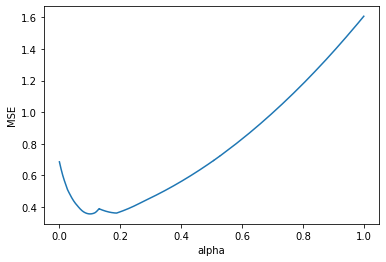

In [21]:
# plot the MSE values for each alpha value
plt.plot(alpha, mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [22]:
y_test.shape

(51,)

In [23]:
# create a lasso regression with alpha value = 0.10080999999999361

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test, y_test, test_size=0.9, random_state=42)

reg_model = Lasso(alpha=best_alpha)
reg_model.fit(X_train, y_train)
y_pred_new = reg_model.predict(X_test)

print(reg_model.alpha)

# print the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_new))

# print the R2 score
print('R2 score: %.2f' % r2_score(y_test, y_pred_new))

0.10080999999999361
Mean squared error: 0.24
R2 score: 0.99


In [24]:
# create a lasso regression with alpha value = 0.0487
reg_model = Lasso()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

print(reg_model.alpha)

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

# print the R2 score
print('R2 score: %.2f' % r2_score(y, y_pred))

1.0
Mean squared error: 2.69
R2 score: 0.96
